In [1]:
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(18,12)})

In [7]:
df = pd.read_excel('./results.xlsx')
df

,control,niggly_screws,thrice_used,impact_driver,wonky_hole,reemed,edge,sticking_out,jank_hanger
0,16.2,12.8,17.8,16.2,17.7,17.3,17.1,10.8,13.9
1,12.8,15.0,16.8,16.0,17.4,NaN,11.7,11.8,NaN
2,13.4,17.9,15.5,17.9,16.1,NaN,NaN,NaN,NaN
3,17.0,13.3,17.0,15.6,17.6,NaN,NaN,NaN,NaN
4,16.5,20.0,16.7,19.3,16.2,NaN,NaN,NaN,NaN
5,16.7,17.6,18.6,17.7,17.4,NaN,NaN,NaN,NaN


In [8]:
display(df.mean())
display(df.std())

control          15.433333
niggly_screws    16.100000
thrice_used      17.066667
impact_driver    17.116667
wonky_hole       17.066667
reemed           17.300000
edge             14.400000
sticking_out     11.300000
jank_hanger      13.900000
dtype: float64

control          1.835938
niggly_screws    2.850965
thrice_used      1.053882
impact_driver    1.421853
wonky_hole       0.720185
reemed                NaN
edge             3.818377
sticking_out     0.707107
jank_hanger           NaN
dtype: float64

In [9]:
import matplotlib
matplotlib.rc('font', size=16)
matplotlib.rc('axes', labelsize=32)
matplotlib.rc('xtick', labelsize=22)
matplotlib.rc('ytick', labelsize=22)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'control'),
  Text(1, 0, 'niggly_screws'),
  Text(2, 0, 'thrice_used'),
  Text(3, 0, 'impact_driver'),
  Text(4, 0, 'wonky_hole')])

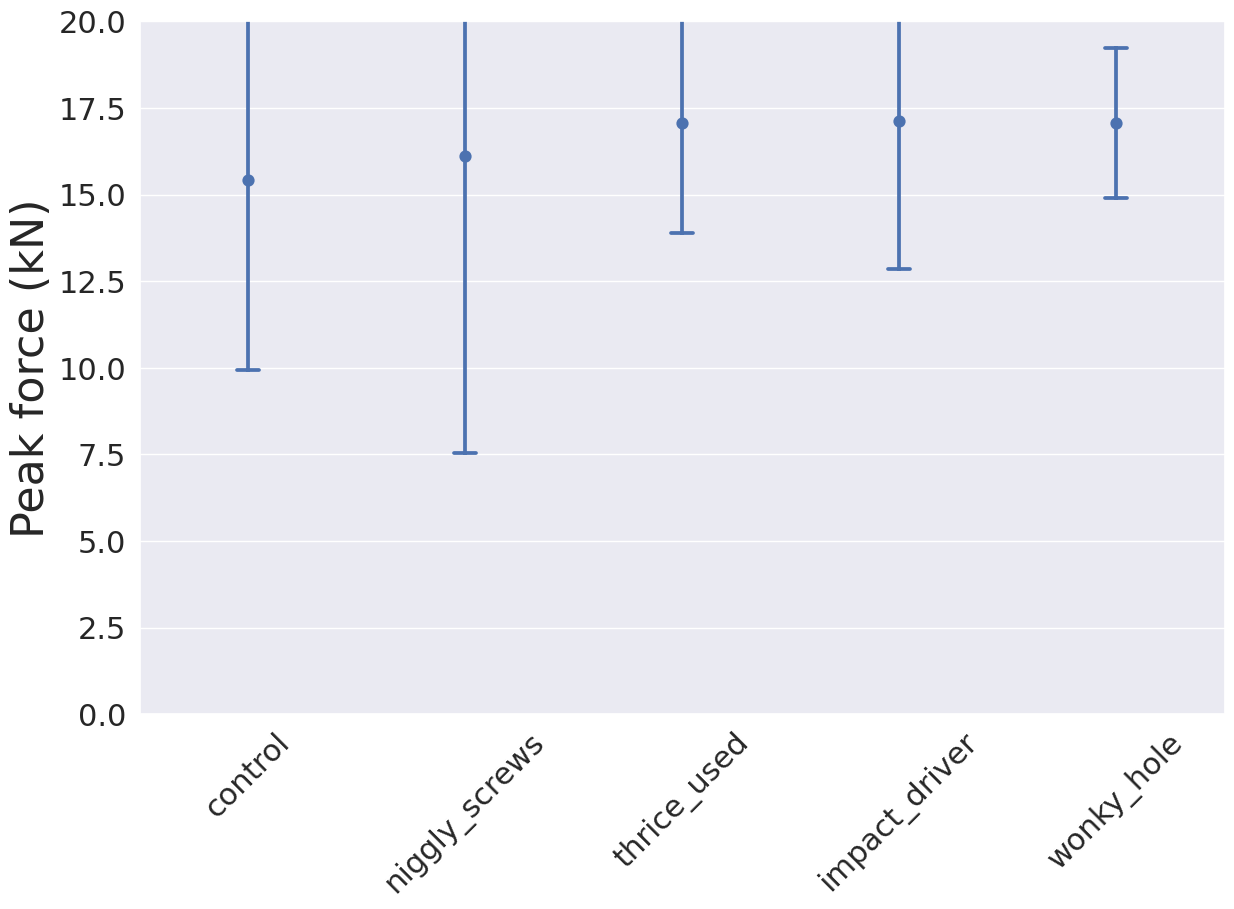

In [31]:
import math
plt.figure(figsize=(14,9))
ax = sns.pointplot(data=df.iloc[:, :5], errorbar = ('sd', 3), linestyle='none', capsize=.1)
ax.set(ylim=(0, 20), ylabel='Peak force (kN)')
plt.xticks(rotation=45)

control
N(15.43, 0.75)

niggly_screws
N(16.1, 1.16)

thrice_used
N(17.07, 0.43)

impact_driver
N(17.12, 0.58)

wonky_hole
N(17.07, 0.29)



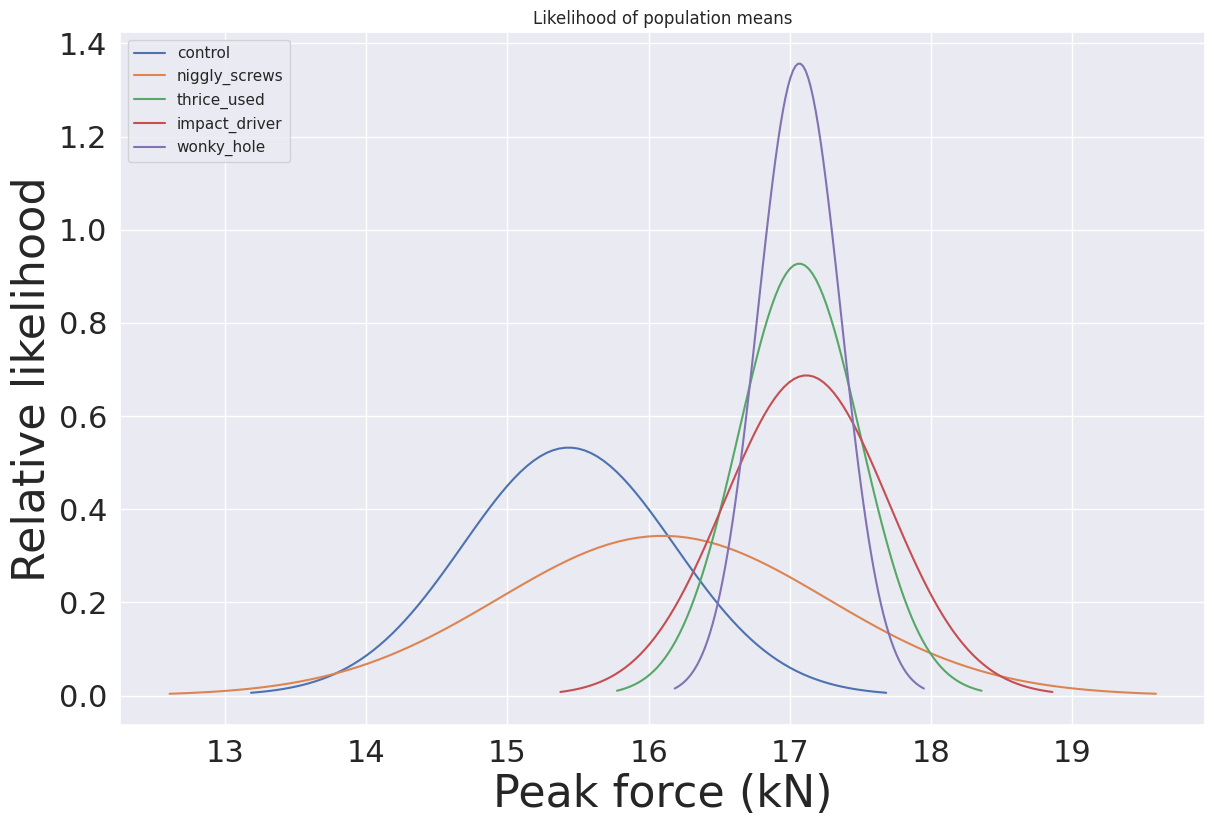

In [11]:
f = plt.figure(figsize=(14,9))
for key in df: 
    col = df[key]
    
    if sum(col.notnull())<3:
        continue
    
    stderr = col.std() / (6**0.5)
    mu = col.mean()
    print(key)
    print(f"N({round(mu,2)}, {round(stderr,2)})")
    print()

    x = np.linspace(mu - 3*stderr, mu + 3*stderr, 100)
    plt.plot(x, stats.norm.pdf(x, mu, stderr))
    
plt.legend(loc="upper left", labels=df.columns)
plt.xlabel('Peak force (kN)')
plt.ylabel('Relative likelihood')
plt.title('Likelihood of population means')
plt.show()

/tmp/ipykernel_35019/272872071.py:2: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  ax = sns.stripplot(data=df, size=10, jitter=0, edgecolor='gray', linewidth=1)


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'control'),
  Text(1, 0, 'niggly_screws'),
  Text(2, 0, 'thrice_used'),
  Text(3, 0, 'impact_driver'),
  Text(4, 0, 'wonky_hole'),
  Text(5, 0, 'reemed'),
  Text(6, 0, 'edge'),
  Text(7, 0, 'sticking_out'),
  Text(8, 0, 'jank_hanger')])

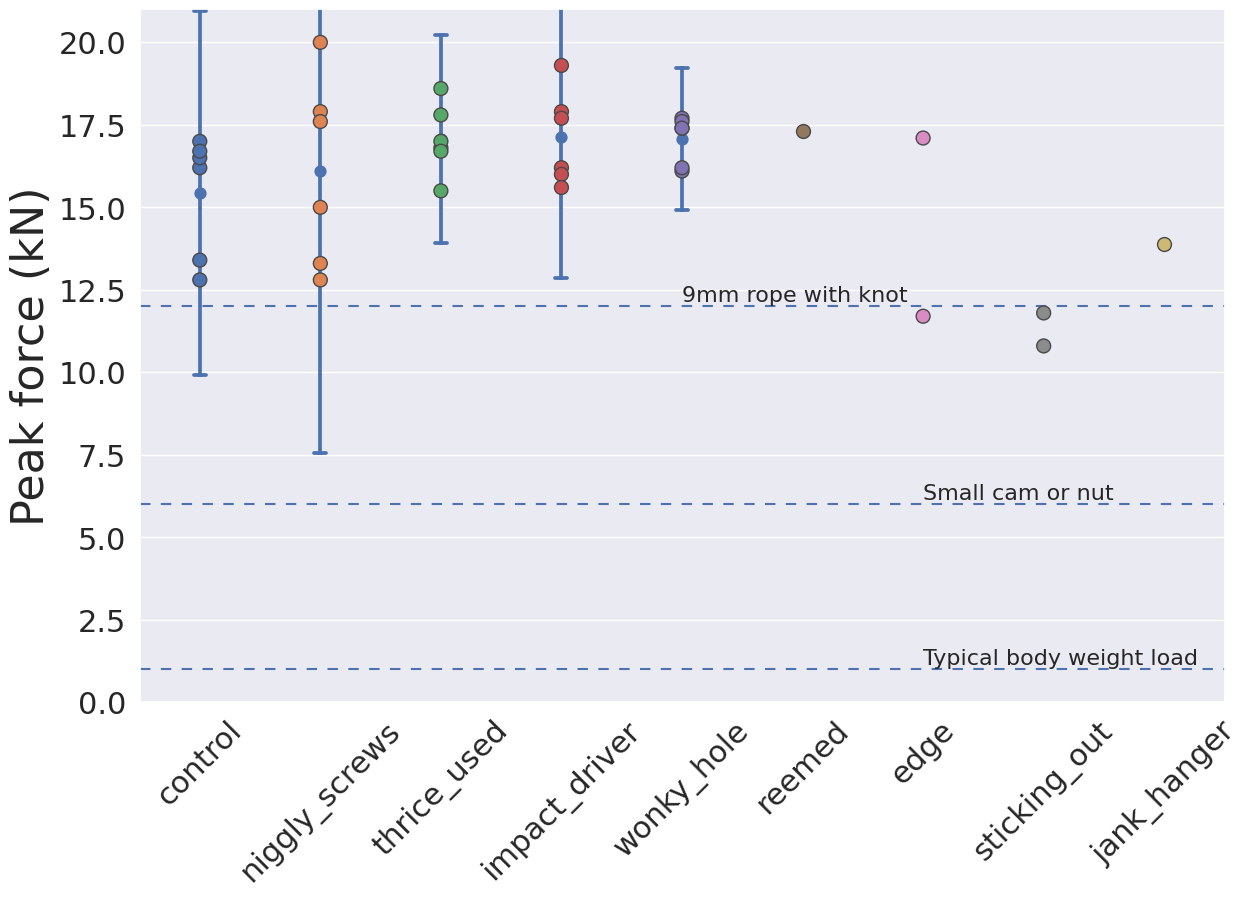

In [30]:
plt.figure(figsize=(14,9))
ax = sns.stripplot(data=df, size=10, jitter=0, edgecolor='gray', linewidth=1)
ax = sns.pointplot(data=df.iloc[:, :5], errorbar = ('sd', 3), linestyle='none', capsize=.1)
ax.set(ylabel='Peak force (kN)', ylim=(0,21))

ax.axhline(1, linestyle=(0, (5, 5)))
ax.text(6, 1.15, "Typical body weight load")

ax.axhline(12, linestyle=(0, (5, 5)))
ax.text(4, 12.15, "9mm rope with knot")

ax.axhline(6, linestyle=(0, (5, 5)))
ax.text(6, 6.15, "Small cam or nut")

plt.xticks(rotation=45)


<Axes: >

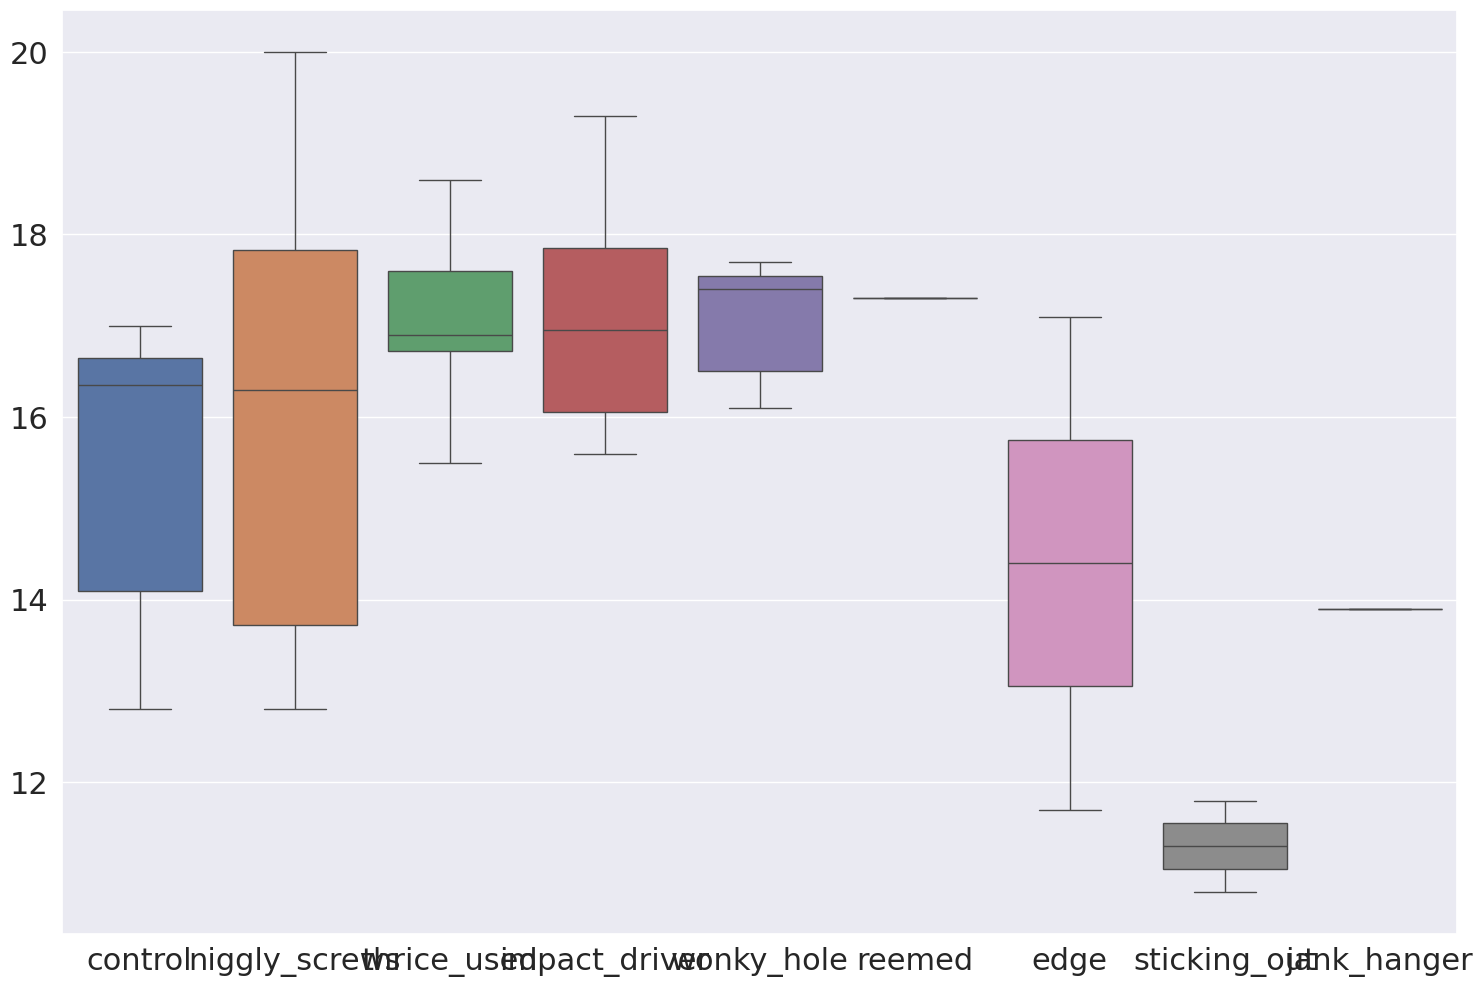

In [13]:
sns.boxplot(data=df)

# 4 Lolz

<AxesSubplot: >

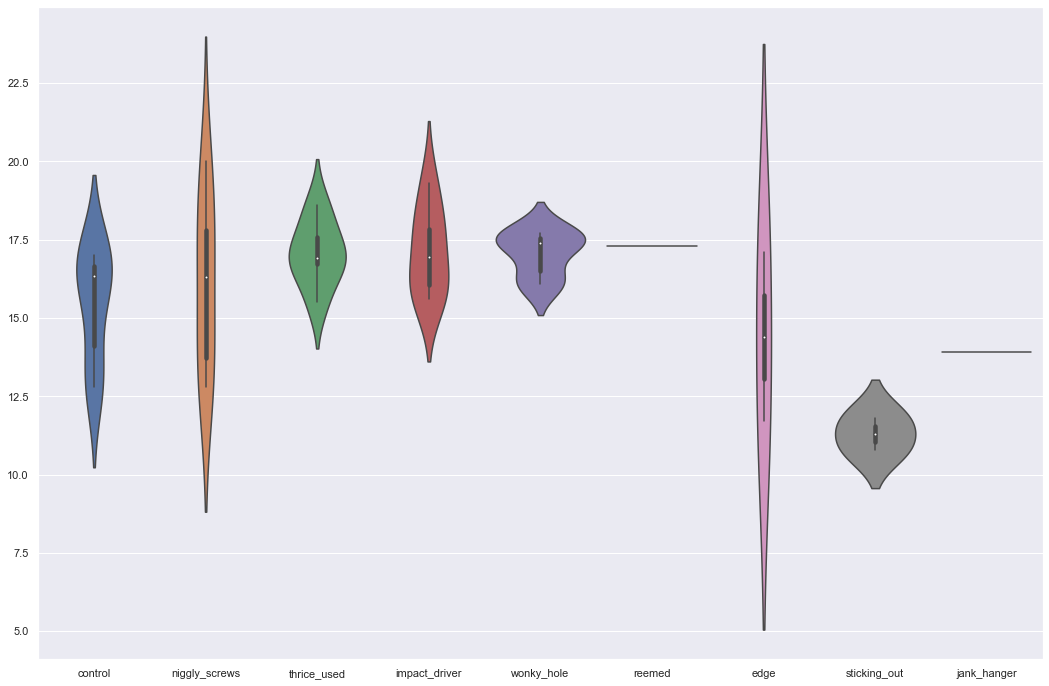

In [17]:
sns.violinplot(df)

<AxesSubplot: >

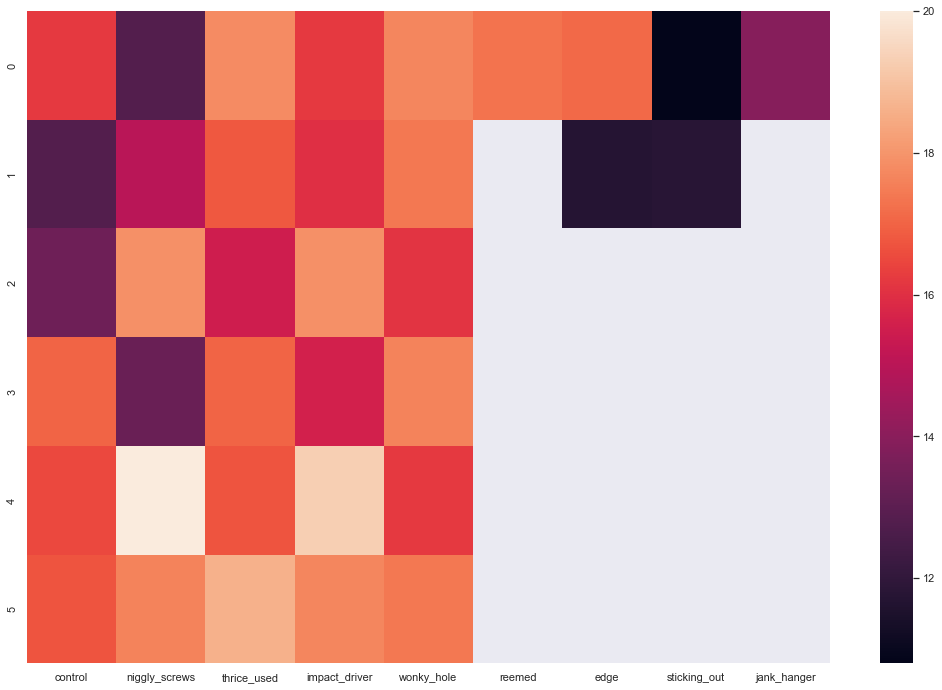

In [19]:
sns.heatmap(df)

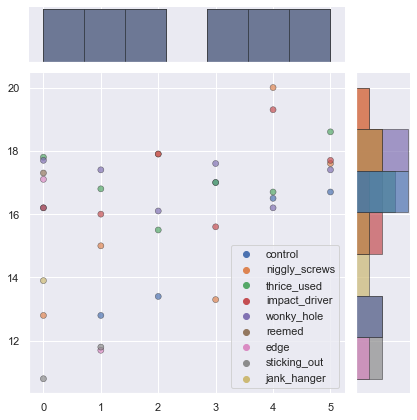

In [20]:
g = sns.JointGrid(df)
g.plot(sns.scatterplot, sns.histplot, alpha=.7, edgecolor=".2", linewidth=.5)

<ipython-input-21-339c1748af8f>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, kind="kde")
<ipython-input-21-339c1748af8f>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(df, kind="kde")


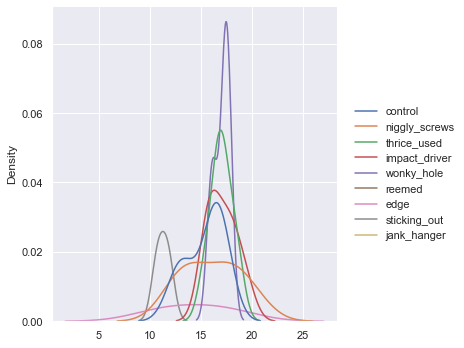

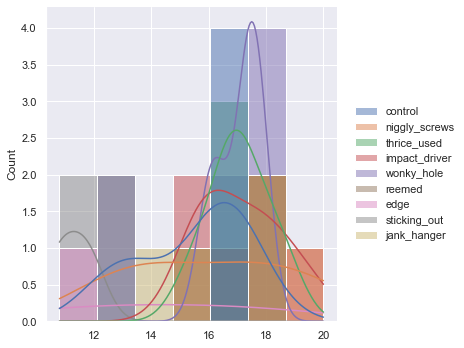

In [21]:
sns.displot(df, kind="kde")
sns.displot(df, kde=True)